# Deep Learning in Python

Large neural networks (aka Deep Learning) are the current hot-topic in machine learning. In this assignmnet, you will learn to build and evaluate alternative neural network models.

There are many relatively new libraries for using neural networks, but there isn't yet a single standard. We will use keras, which is arguably the most popular library for machine learning.

You can find the data [here](data/).

## Part 1: Getting comfortable with Keras

1. Install keras using the command `pip install keras`

2. Read the example code for [Multilayer Perceptron](http://keras.io/examples/) (that's a fancy name for the standard feedforward neural network).

    There is a lot going on in this code. Take the time to make sure you understand what is going on. As with many high level APIs there is a learning curve involved in aligning your understanding with the interface provided by the API. There are also more examples on that page and in kera's GitHub [repository](https://github.com/fchollet/keras/tree/master/examples) if you're looking for more examples/context.



In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.


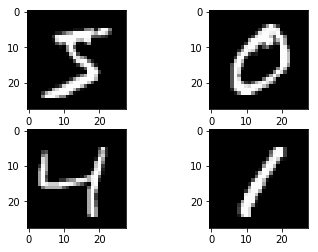

In [2]:

# Plot ad hoc mnist instances

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Part 2: Building and testing Neural Network models

You will now use keras to build neural networks for a range of predictive modeling problems. Over the course of the afternoon, you should use at least two of the following datasets:

* churn.csv (which you have used previously, and is also in today's data directory).
  * For this data you will be doing binary classification, this means that the final layer in your network should have one node with sigmoid activation (just like we had in logistic regression) and that the loss function should be binary cross entropy.
* The MNIST dataset. Each observation in this dataset depicts a handwritten digit. The first column (called 'label') describes what number the writer was trying to write. The images of the digits were scanned onto a 28x28 grid, and the darkness on each part of the grid is depicted as a number. The darkness of these parts of the grids are called pixel intensities, and each predictive column represents the darkness of a single pixel. This dataset is also in the data directory.
  * For this data you will be doing multiclass classification, this means that the final layer in your network should have the same number of nodes as there are classes with softmax activation (this is generalization of sigmoid function) and that the lass function should be categorical cross entropy.

For each problem/dataset, create a train/test split where 70% of your data is used for training (and 30% is used for testing). You will also need to choose an evaluation metric appropriate for the problem at hand. Use only a single evaluation metric, and justify (in writing) why it is a good metric to use.

You will now experiment with different neural network architectures (e.g. number and size of hidden layers), levels of dropout, and number of variables entering the network. 

Every time you try a new network, write down your predictions for how this network's performance will compare to your previous networks' performance in terms of:

* execution speed
* training error
* validation error

The models take a while to run. So you can write your predictions while they run. After the model runs, give a 1-sentence summary of how the model performance compared to your expectations. Optionally, compare your model to previous models you have learned (random forest, and either linear or logistic regression.)

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import os

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:

data_augmentation = True
num_classes = 10
# save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
df = pd.read_csv('data/mnist_train.csv')

df.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = df.drop(['label'], axis=1)
y = df['label']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# (x_train, y_train), (x_test, y_test) = df
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (29400, 784)
29400 train samples
12600 test samples


In [7]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [8]:
# Convert class vectors to binary class matrices.
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [9]:
batch_size = 10
num_classes = 10
epochs = 25


model = Sequential()
model.add(Dense(64,input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# initiate RMSprop optimizer
# opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))


print(model.summary())

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 29400 samples, validate on 12600 samples
Epoch 1/25
29400/29400 [==============================] - 9s 294us/step - loss: 14.5591 - acc: 0.0967 - val_loss: 14.5613 - val_acc: 0.0966
Epoch 2/25
29400/29400 [==============================] - 8s 279us/step - loss: 14.5580 - acc: 0.0968 - val_loss: 14.5613 - val_acc: 0.0966
Epoch 3/25
29400/29400 [==============================] - 8s 287us/step - loss: 14.5578 - acc: 0.0968 - val_loss: 14.5613 - val_acc: 0.0966
Epoch 4/25
29400/29400 [==============================] - 8s 279us/step - loss: 14.5578 - acc: 0.0968 - val_loss: 14.5613 - val_acc: 0.0966
Epoch 5/25
29400/29400 [==============================] - 8s 277us/step - loss: 14.5578 - acc: 0.0968 - val_loss: 14.5613 - val_acc: 0.0966
Epoch 6/25
29400/29400 [==============================] - 8s 275us/step - loss: 14.5578 - acc: 0.0968 - val_loss: 14.5613 - val_acc: 0.0966
Epoch 7/25
29400/29400 [==============================] - 8s 288us/step - loss: 14.5578 - acc: 0.0968 - val_lo